<a href="https://colab.research.google.com/github/2jeonghoon/LinearAlgebra/blob/main/pca_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()

K = 20
faces = faces_all.images[faces_all.target == K]

faces

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


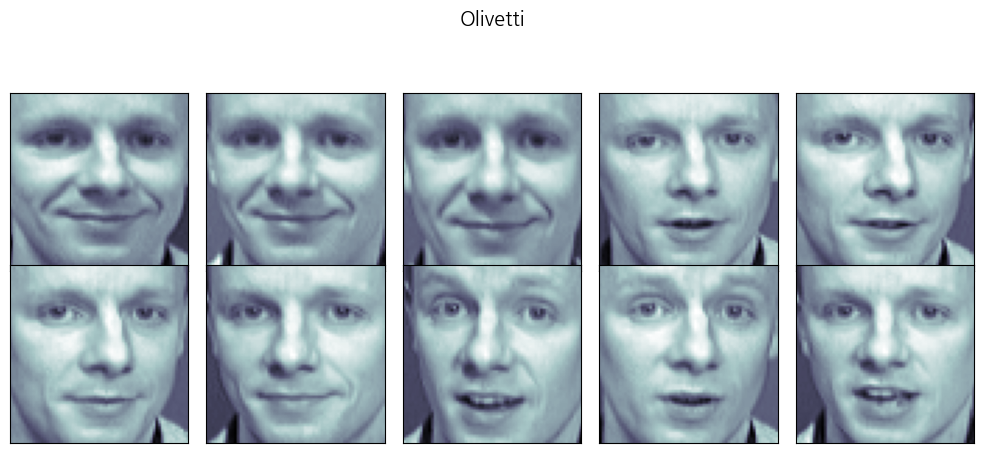

In [5]:
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'}) # 폰트 설정

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
plt.suptitle("Olivetti")
plt.tight_layout()
plt.show()

- PCA 분석(2개의 주성분 선택)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target==K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

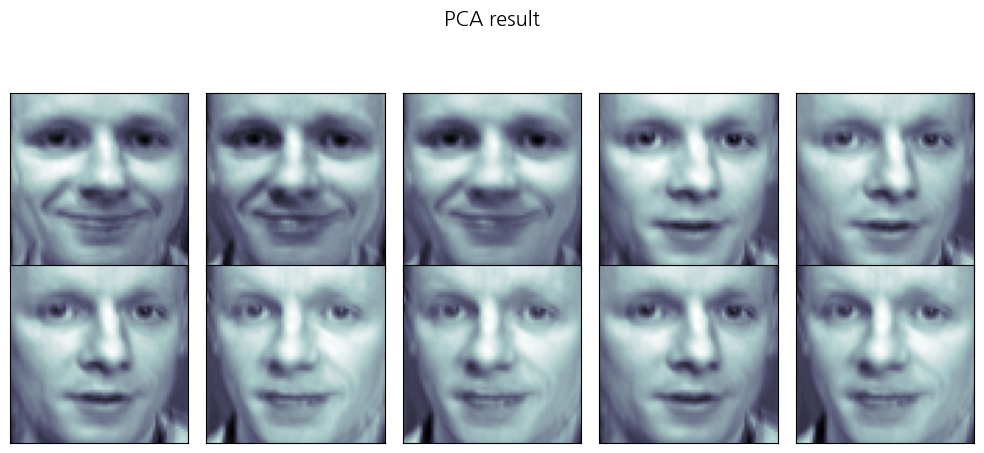

In [7]:
import matplotlib.pyplot as plt
def draw_faces(faces, N, M, title='', inv = False):
    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(top = 1, bottom=0, hspace=0, wspace=0.05)
    for n in range(N*M):
        ax = fig.add_subplot(N, M, n+1)
        if inv == False:
            ax.imshow(faces[n], cmap=plt.cm.bone)
        else:
            ax.imshow(faces[n].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
draw_faces(X_inv, 2, 5, 'PCA result', True)

- 원점과 두 개의 eigen face

  10장의 사진은 아래 3장으로 모두 표현할 수 있다.




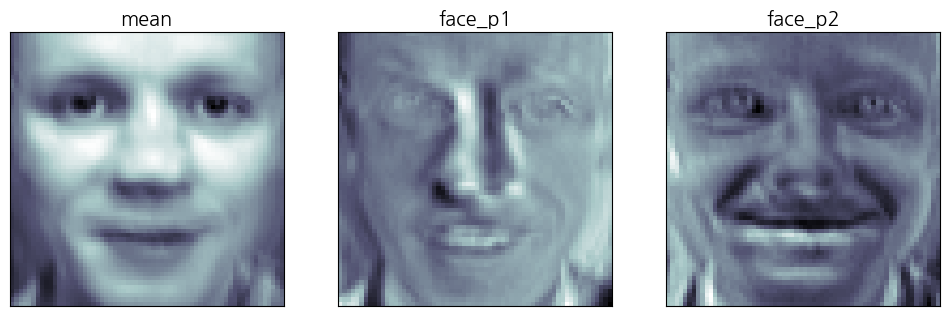

In [8]:
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

plt.figure(figsize=(12, 7))
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('mean')
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p1')
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p2')
plt.show()

가중치 선정

In [9]:
import numpy as np

N = 2
M = 5
w = np.linspace(-5, 10, N*M)
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

첫 번째 성분 변화

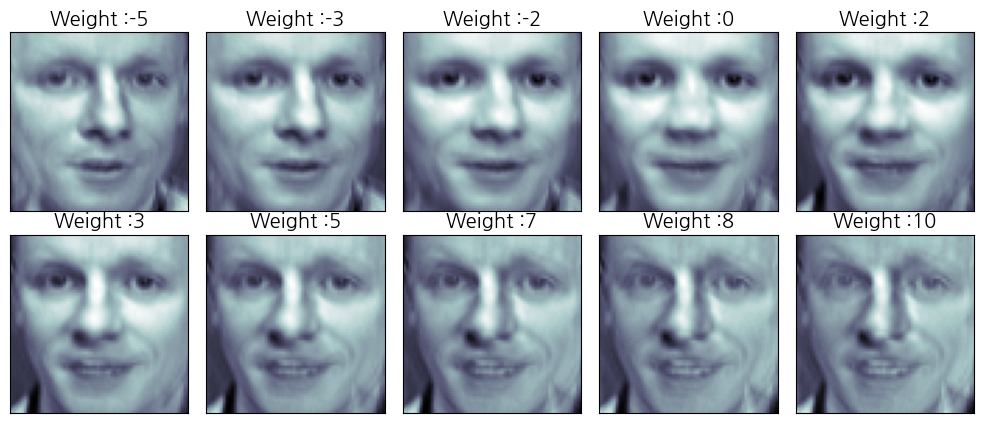

In [10]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p1, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([]);
    plt.title('Weight :' + str(round(w[n])))

plt.tight_layout()
plt.show()

두 번째 성분 변화

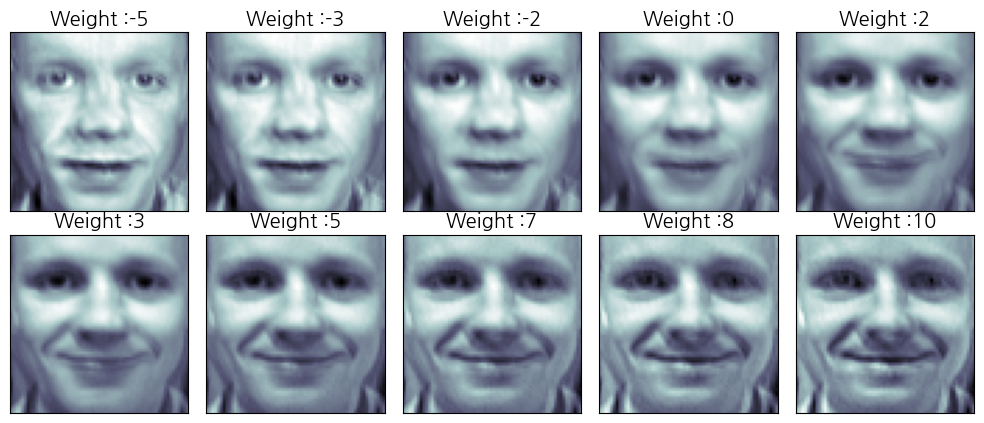

In [11]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([]);
    plt.title('Weight :' + str(round(w[n])))

plt.tight_layout()
plt.show()

두 개의 성분 표현

In [12]:
nx, ny = (5, 5)

x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)
w1, w2 = np.meshgrid(x, y)
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

shape 조정

In [13]:
w1.shape

(5, 5)

In [14]:
w1 = w1.reshape(-1, )
w2 = w2.reshape(-1, )
w1.shape

(25,)

재합성

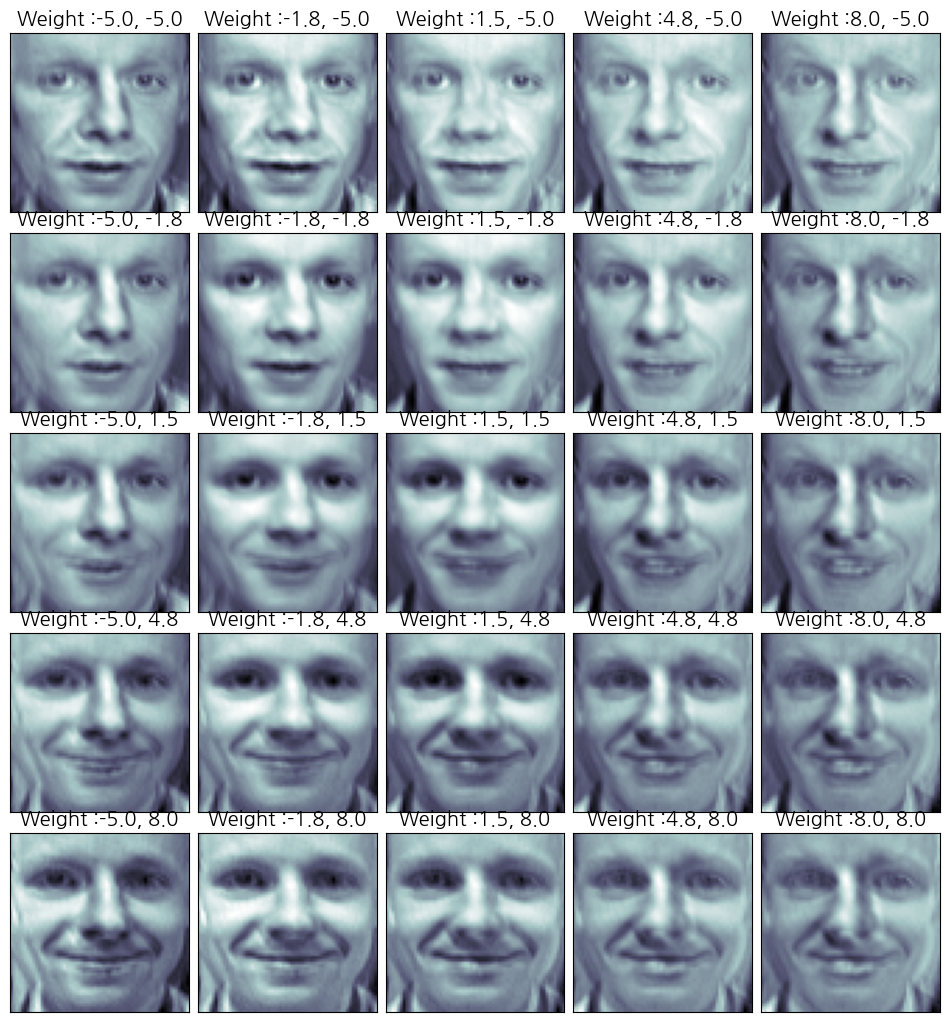

In [15]:
fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

N = 5
M = 5

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([]);
    plt.title('Weight :' + str(round(w1[n], 1)) + ', ' + str(round(w2[n], 1)))

plt.show()